In [1]:
#import all the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset in to dataframe
df = pd.read_csv('data/XOM.csv')

In [3]:
# Visually scan the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,12_day_EMA,30_day_EMA,MACD,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
0,2016-05-09,88.599998,88.760002,87.230003,88.570000,69.386581,11159500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-10,88.900002,90.000000,88.820000,89.989998,70.499031,12509100.0,12509100,NaN,NaN,NaN,1.419998,1.419998,0.000000,NaN,NaN,NaN,NaN
2,2016-05-11,89.160004,89.680000,88.720001,88.809998,70.159325,11660200.0,848900,NaN,NaN,NaN,-1.180000,0.000000,1.180000,NaN,NaN,NaN,NaN
3,2016-05-12,89.800003,89.930000,89.150002,89.669998,70.838730,10720500.0,11569400,NaN,NaN,NaN,0.860000,0.789024,0.000000,NaN,NaN,NaN,NaN
4,2016-05-13,89.279999,89.660004,88.510002,88.660004,70.040833,9721100.0,1848300,NaN,NaN,NaN,-1.009994,0.000000,1.009994,NaN,NaN,NaN,NaN


In [4]:
#Rows and columns in the dataframe
df.shape

(1267, 18)

## EDA 

In [5]:
#Check for null values in the columns
df.isna().sum()

Date           8
Open           8
High           8
Low            8
Close          8
Adj Close      8
Volume         8
OBV            0
12_day_EMA    11
30_day_EMA    29
MACD          29
Change         1
Gain           1
Loss           1
Avg Gain      14
Avg Loss      14
RS            14
RSI           14
dtype: int64

The null values in the dataframe exist as some columns required previous days information. We will drop all the rows with null values.

In [6]:
#Drop the null values rows
df = df.dropna()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,12_day_EMA,30_day_EMA,MACD,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
29,2016-06-20,91.290001,91.589996,91.070000,91.120003,71.984215,9388500.0,-17304300,90.341667,89.807667,0.534001,0.400002,0.846177,0.000000,0.291747,0.186427,1.564935,61.012664
30,2016-06-21,90.720001,91.639999,90.250000,91.529999,72.308121,8557500.0,-8746800,90.605000,89.906333,0.698667,0.409996,0.512596,0.000000,0.320805,0.186427,1.720801,63.246119
31,2016-06-22,91.839996,91.930000,91.010002,91.169998,72.023705,8785400.0,-17532200,90.757500,89.945667,0.811834,-0.360001,0.000000,0.360001,0.320805,0.161428,1.987297,66.524920
32,2016-06-23,91.930000,92.070000,91.190002,91.800003,72.521408,9464500.0,-8067700,90.848334,90.045333,0.803001,0.630005,1.749306,0.000000,0.438200,0.149999,2.921344,74.498542
33,2016-06-24,89.879997,90.800003,89.150002,89.389999,70.617531,20010500.0,-28078200,90.731667,90.036000,0.695667,-2.410004,0.000000,2.410004,0.408561,0.322142,1.268261,55.913355


In [8]:
df.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
OBV           0
12_day_EMA    0
30_day_EMA    0
MACD          0
Change        0
Gain          0
Loss          0
Avg Gain      0
Avg Loss      0
RS            0
RSI           0
dtype: int64

Now our dataframe does not include any null values. 

We will filter out the columns we need for modeling by creating a new dataframe.

In [9]:
# Final Dataframe
df_final = df[['Close', 'Volume','OBV','MACD','RSI']]

df_final.head()

,Close,Volume,OBV,MACD,RSI
29,91.120003,9388500.0,-17304300,0.534001,61.012664
30,91.529999,8557500.0,-8746800,0.698667,63.246119
31,91.169998,8785400.0,-17532200,0.811834,66.524920
32,91.800003,9464500.0,-8067700,0.803001,74.498542
33,89.389999,20010500.0,-28078200,0.695667,55.913355


---

## Visualization

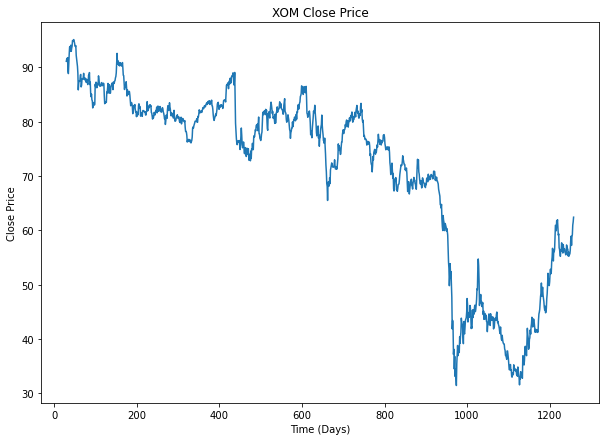

In [10]:
plt.figure(figsize = (10,7))
plt.plot( df["Close"])
plt.xlabel("Time (Days)")
plt.ylabel("Close Price")
plt.title("XOM Close Price")
plt.show()

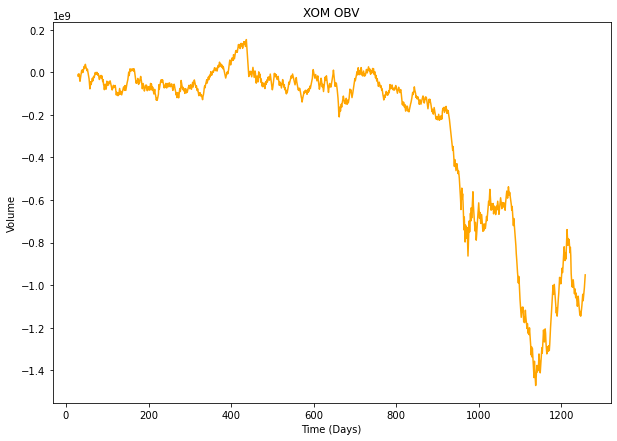

In [11]:
plt.figure(figsize= (10,7))
plt.plot( df['OBV'], color = 'Orange')
plt.xlabel("Time (Days)")
plt.ylabel("Volume")
plt.title("XOM OBV")
plt.show()

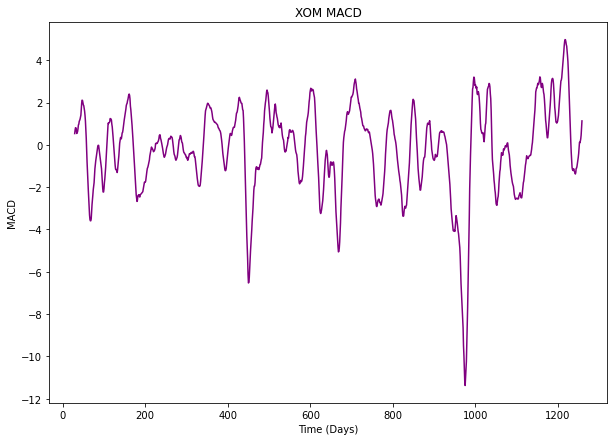

In [12]:
plt.figure(figsize= (10,7))
plt.plot( df['MACD'], color = 'Purple')
plt.xlabel("Time (Days)")
plt.ylabel("MACD")
plt.title("XOM MACD")
plt.show()

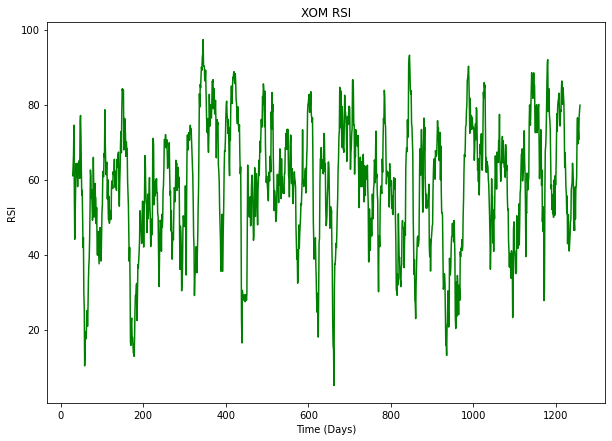

In [13]:
plt.figure(figsize= (10,7))
plt.plot( df['RSI'], color = 'Green')
plt.xlabel("Time (Days)")
plt.ylabel("RSI")
plt.title("XOM RSI")
plt.show()

We can see every indicator behave differently to price change. We can deduce that their is no correlation thee. Let's check its correlation by plotting each against one another.

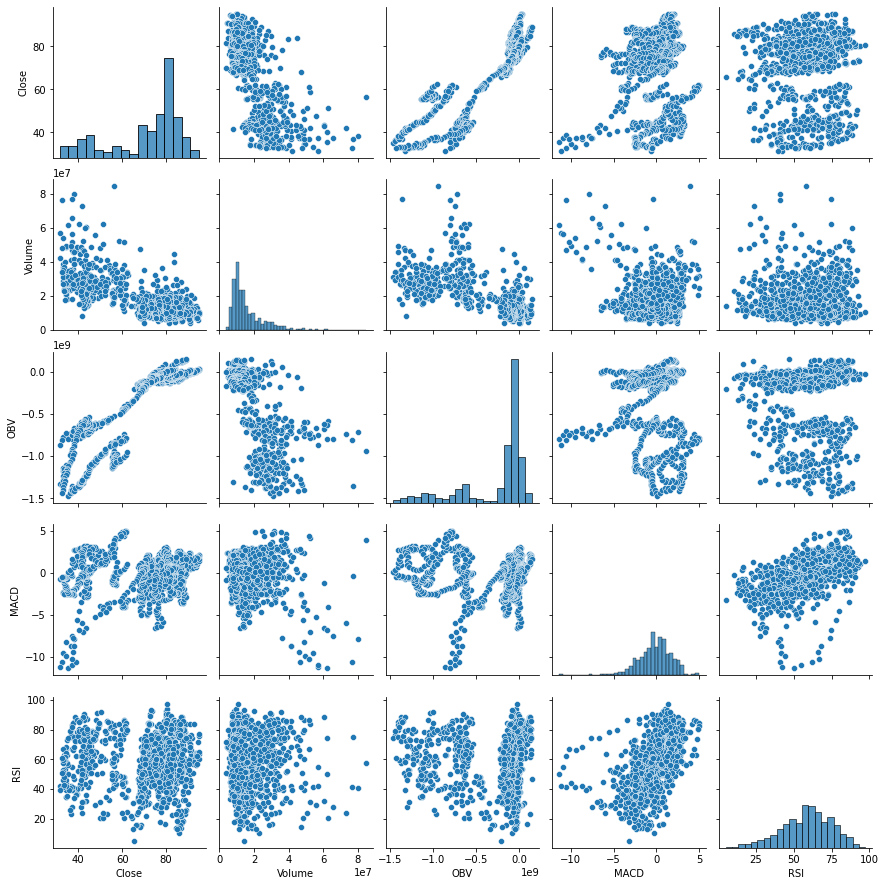

In [14]:
sns.pairplot(df_final)


### Correlation Matrix

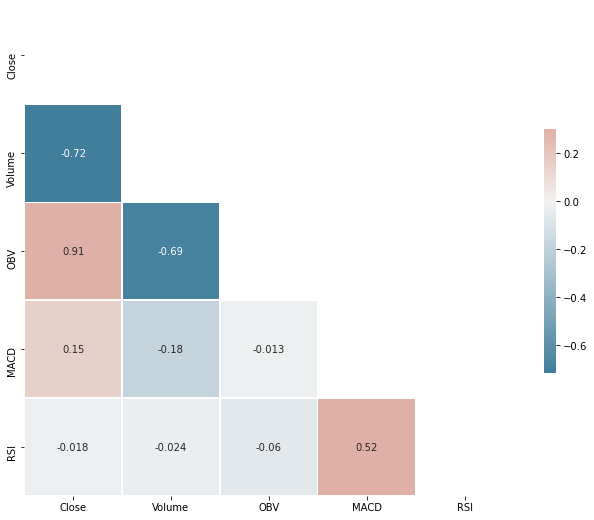

In [15]:
# Compute the correlation matrix
corr = df_final.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the above visuals it is clear that there is hardly any correlation between the technical indicators.

---

## **LSTM Modeling**

### Set the Training set 

In [16]:
#Selecting first 1000 values to train the dataset
training_set = df_final.iloc[:1000].values

In [17]:
training_set

array([[ 9.11200030e+01,  9.38850000e+06, -1.73043000e+07,
         5.34000550e-01,  6.10126638e+01],
       [ 9.15299990e+01,  8.55750000e+06, -8.74680000e+06,
         6.98666917e-01,  6.32461186e+01],
       [ 9.11699980e+01,  8.78540000e+06, -1.75322000e+07,
         8.11833750e-01,  6.65249201e+01],
       ...,
       [ 5.30800020e+01,  4.13289000e+07, -5.83893800e+08,
         1.47000003e+00,  8.58695505e+01],
       [ 5.47400020e+01,  3.35794000e+07, -5.50314400e+08,
         1.88383355e+00,  8.45434822e+01],
       [ 5.35200000e+01,  2.72769000e+07, -5.77591300e+08,
         2.31116677e+00,  8.52112878e+01]])

### Feature Scaling

**Scaling the dataset:** LSTM is highly sensitive in nature. We will need to scale it. We will use Standard Scaler for this dataset, as MinMax scaler is inappropriate for stock prices.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [19]:
training_set_scaled

array([[ 1.2550959 , -0.50789724,  0.52392861,  0.44272712,  0.20390645],
       [ 1.29092072, -0.59867521,  0.57086134,  0.52082254,  0.33682667],
       [ 1.25946439, -0.57377954,  0.52267871,  0.57449356,  0.53195889],
       ...,
       [-2.06878125,  2.98125421, -2.58347365,  0.88663852,  1.68322122],
       [-1.92373299,  2.13470316, -2.39931086,  1.0829051 ,  1.60430256],
       [-2.0303349 ,  1.44622158, -2.54890823,  1.28557411,  1.64404586]])

**We will use set of 60 values as sequence to predict the final outcome.**  Our X_train will have 940 sequences each with length of 60. y_train will have 940 values of stock prices corresponding to each sequence

In [20]:
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 3])  # Selecting indicator/price sequence 
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train.shape

(940, 60, 1)

In [22]:
y_train.shape

(940,)

In [23]:
#import models using Keras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [24]:
#Initialize the model
model = Sequential()

#Set the inputs for first layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))   # use of dropout to prevent any overfitting

# Add  three hidden layers
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Get the output as single value
model.add(Dense(units = 1))

# set optimizer and loss metrics
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fit the model 
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
30/30 [==============================] - 22s 61ms/step - loss: 0.7493 0s - loss:
Epoch 2/50
30/30 [==============================] - 2s 61ms/step - loss: 0.4540
Epoch 3/50
30/30 [==============================] - 2s 65ms/step - loss: 0.3743
Epoch 4/50
30/30 [==============================] - 2s 69ms/step - loss: 0.3019
Epoch 5/50
30/30 [==============================] - 2s 67ms/step - loss: 0.2980
Epoch 6/50
30/30 [==============================] - 2s 68ms/step - loss: 0.2685
Epoch 7/50
30/30 [==============================] - 2s 69ms/step - loss: 0.2396
Epoch 8/50
30/30 [==============================] - 2s 68ms/step - loss: 0.2084
Epoch 9/50
30/30 [==============================] - 2s 67ms/step - loss: 0.2062
Epoch 10/50
30/30 [==============================] - 2s 68ms/step - loss: 0.1805
Epoch 11/50
30/30 [==============================] - 2s 68ms/step - loss: 0.1709
Epoch 12/50
30/30 [==============================] - 2s 68ms/step - loss: 0.1705
Epoch 13/50
30/30 [======

In [25]:
#Standard scalar for test set
scaler_test = StandardScaler()
test_set_scaled = scaler_test.fit_transform(df_final['MACD'].values.reshape(-1,1))

In [26]:
#set the test set

dataset_total = pd.concat((df_final['MACD'].iloc[:1000], df_final['MACD'][1000:]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_final['MACD'][1000:]) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler_test.transform(inputs)
X_test = []
for i in range(60, 291):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler_test.inverse_transform(predicted_stock_price)

In [27]:
predicted_stock_price

array([[-4.23598433e+00],
       [-4.01280546e+00],
       [-3.74318624e+00],
       [-3.39047194e+00],
       [-2.93928957e+00],
       [-2.38642645e+00],
       [-1.74269032e+00],
       [-9.71201479e-01],
       [ 1.93775192e-01],
       [ 2.47054532e-01],
       [ 1.73600063e-01],
       [ 8.29894021e-02],
       [ 1.47495524e-03],
       [-8.14719573e-02],
       [-1.80830717e-01],
       [-3.00679237e-01],
       [-4.30100143e-01],
       [-5.28224409e-01],
       [-5.60770154e-01],
       [-5.19591749e-01],
       [-4.16545868e-01],
       [-2.74620444e-01],
       [-1.18666060e-01],
       [ 3.14897969e-02],
       [ 1.62007257e-01],
       [ 2.65871286e-01],
       [ 3.39919150e-01],
       [ 3.83131027e-01],
       [ 3.98301363e-01],
       [ 3.91948223e-01],
       [ 3.71354163e-01],
       [ 3.43630254e-01],
       [ 3.16762984e-01],
       [ 2.94922113e-01],
       [ 2.71180630e-01],
       [ 2.47956648e-01],
       [ 2.29250833e-01],
       [ 2.20724747e-01],
       [ 2.2

In [28]:
real_stock_price = df['Close'][1000:].values

In [29]:
real_stock_price

array([50.650002, 46.18    , 47.169998, 47.139999, 48.200001, 46.630001,
       46.919998, 45.98    , 46.419998, 46.700001, 44.5     , 45.169998,
       43.619999, 44.32    , 44.720001, 43.709999, 44.080002, 44.389999,
       43.240002, 43.139999, 41.360001, 42.650002, 42.66    , 44.07    ,
       44.630001, 44.279999, 43.52    , 42.5     , 44.650002, 43.610001,
       43.700001, 43.43    , 44.07    , 43.549999, 44.029999, 41.869999,
       42.080002, 42.25    , 43.470001, 43.849998, 43.639999, 43.439999,
       44.509998, 44.970001, 44.09    , 43.009998, 43.200001, 42.639999,
       42.43    , 41.959999, 41.32    , 41.009998, 42.220001, 40.880001,
       40.009998, 39.740002, 40.689999, 39.939999, 39.43    , 39.189999,
       39.110001, 39.080002, 38.18    , 37.950001, 37.      , 36.900002,
       36.66    , 36.27    , 37.810001, 37.799999, 37.189999, 36.43    ,
       35.529999, 34.389999, 34.32    , 34.639999, 35.310001, 34.279999,
       34.330002, 33.130001, 32.98    , 33.740002, 

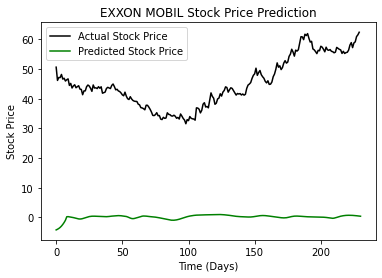

In [30]:
plt.plot(real_stock_price, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('EXXON MOBIL Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Conclusion

Stock price prediction neither near the actual results nor does it follow the actual stock direction. MACD is not as effective as others.

---
---